# TP4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import correlate

Text(0.5, 1.0, 'Cross kernel')

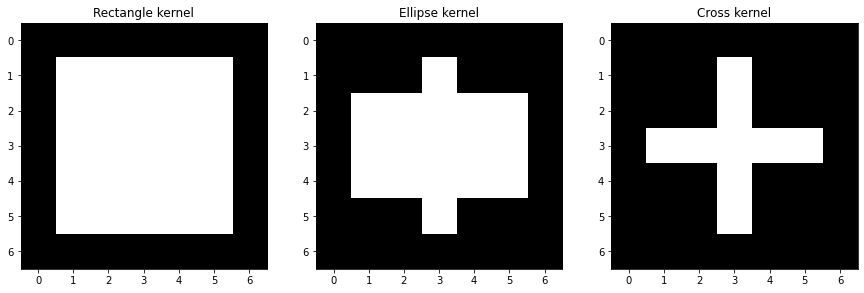

In [6]:
kernel_rect    = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel_cross   = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.pad(kernel_rect, 1, mode='constant'), cmap='gray')
plt.title('Rectangle kernel')
plt.subplot(1,3,2)
plt.imshow(np.pad(kernel_ellipse, 1, mode='constant'), cmap='gray')
plt.title('Ellipse kernel')
plt.subplot(1,3,3)
plt.imshow(np.pad(kernel_cross, 1, mode='constant'), cmap='gray')
plt.title('Cross kernel')

### Erosion et dilatation

(64, 64)


Text(0.5, 1.0, 'Open image')

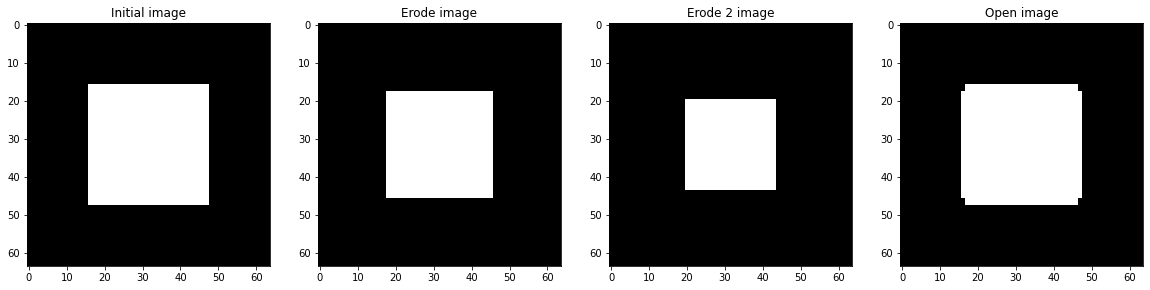

In [7]:
img = np.ones((48-16, 48-16)) #carre nb pixels
img = np.pad(img, 16, mode='constant')
print(img.shape)

kernel = kernel_ellipse
img_erode   = cv2.erode(img, kernel) 
img_erode_2 = cv2.erode(cv2.erode(img, kernel) , kernel)  
img_open    = cv2.dilate(cv2.erode(img, kernel), kernel.T)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Initial image')
plt.subplot(1,4,2)
plt.imshow(img_erode, cmap='gray')
plt.title('Erode image')
plt.subplot(1,4,3)
plt.imshow(img_erode_2, cmap='gray')
plt.title('Erode 2 image')
plt.subplot(1,4,4)
plt.imshow(img_open, cmap='gray')
plt.title('Open image')

### Squelette

In [4]:
def skeletonize(img):
    img = img.copy()
    skel = img.copy()
    skel[:,:] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    while True:
        eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]

        if cv2.countNonZero(img) == 0:
            break

    return skel

(48, 68)


Text(0.5, 1.0, 'Skeletonized salt and pepper image')

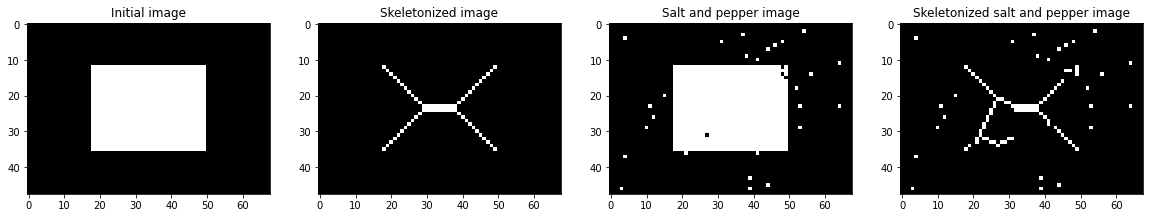

In [5]:
img_2 = np.ones((24, 32)) #rectangle nb lignes / nb colonnes
img_2 = np.pad(img_2, ((12, 12), (18, 18)), mode='constant')
print(img_2.shape)

# Add salt and pepper noise
salt_pepper_noise = np.random.random_sample(img_2.shape)
threshold = 0.01
img_2_sp = np.copy(img_2)
img_2_sp[np.where(salt_pepper_noise < threshold)] = 0
img_2_sp[np.where(salt_pepper_noise > 1.0 - threshold)] = 1

# Skeletonize
img_2_skel = skeletonize(img_2) 
img_2_sp_skel = skeletonize(img_2_sp) 

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(img_2, cmap='gray')
plt.title('Initial image')
plt.subplot(1,4,2)
plt.imshow(img_2_skel, cmap='gray')
plt.title('Skeletonized image')
plt.subplot(1,4,3)
plt.imshow(img_2_sp, cmap='gray')
plt.title('Salt and pepper image')
plt.subplot(1,4,4)
plt.imshow(img_2_sp_skel, cmap='gray')
plt.title('Skeletonized salt and pepper image')

### Erosion et dilatation manuelle

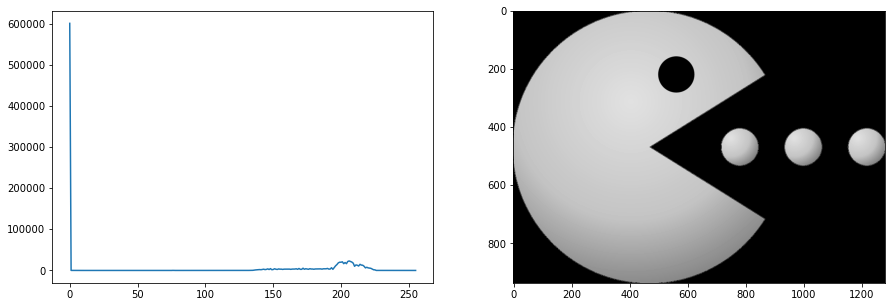

In [9]:
img_ng = cv2.imread("Images/pacman.png", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img_ng],[0],None,[256],[0,256])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.subplot(1, 2, 2)
plt.imshow(img_ng, cmap="gray")

In [50]:
#dilatation « manuelle » d’une image binaire avec un élément structurant 3*3 (OU logique)
def FctDilat(img):
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    
    Tx, Ty = int(struct.shape[0] / 2), int(struct.shape[1] / 2)
    img_dilat = np.zeros((img.shape))
    
    for i in range(Tx, img.shape[0] - Tx):
        for j in range(Ty, img.shape[1] - Ty):
            img_dilat[i, j] = np.logical_and(img[i-Tx:i+Tx+1, j-Ty:j+Ty+1], struct).any()
            
    return img_dilat

#érosion « manuelle » d’une image binaire avec un élément structurant 3*3 (ET logique)
def FctEros(img):
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    
    Tx, Ty = int(struct.shape[0] / 2), int(struct.shape[1] / 2)
    img_eros = np.zeros((img.shape))
    
    for i in range(Tx, img.shape[0] - Tx):
        for j in range(Ty, img.shape[1] - Ty):
            img_eros[i, j] = np.logical_and(img[i-Tx:i+Tx+1, j-Ty:j+Ty+1], struct).all()
            
    return img_eros
#epsilon = 1e-8
#def FctDilat(img, struct):
 #   return np.multiply(correlate(img, struct, 'same') >= epsilon, 1)
#def FctEros(img, struct):
 #   return np.multiply(correlate(img, struct, 'same') == np.sum(struct), 1)


#dilatation « manuelle » d’une image NG avec un élément structurant 3*3 (MAX)
def FctDilatNG(img):
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    
    Tx, Ty = int(struct.shape[0] / 2), int(struct.shape[1] / 2)
    img_dilat = np.zeros((img.shape))
    
    for i in range(Tx, img.shape[0] - Tx):
        for j in range(Ty, img.shape[1] - Ty):
            img_dilat[i, j] = np.max(img[i-Tx:i+Tx+1, j-Ty:j+Ty+1])
            
    return img_dilat

#érosion « manuelle » d’une image NG avec un élément structurant 3*3 (MIN)
def FctErosNG(img):
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    
    Tx, Ty = int(struct.shape[0] / 2), int(struct.shape[1] / 2)
    img_eros = np.zeros((img.shape))
    
    for i in range(Tx, img.shape[0] - Tx):
        for j in range(Ty, img.shape[1] - Ty):
            img_eros[i, j] = np.min(img[i-Tx:i+Tx+1, j-Ty:j+Ty+1])
            
    return img_eros

Text(0.5, 1.0, 'Erosion grayscale')

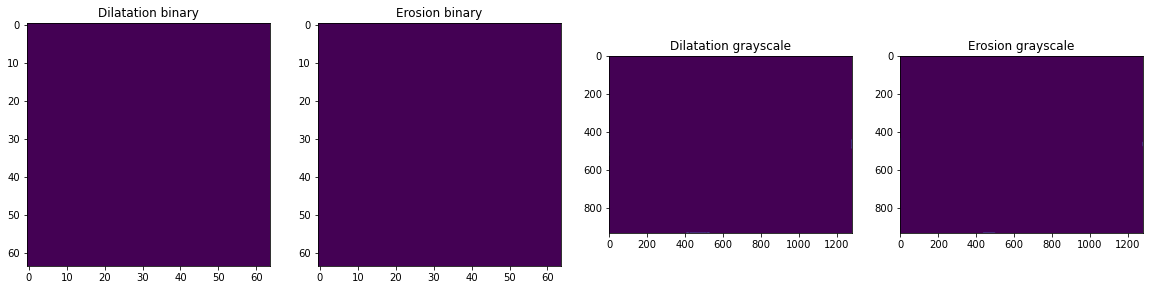

In [52]:
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

img_custom_dilat = FctDilat(img)
img_custom_eros  = FctEros(img)

img_custom_dilat_ng = FctDilatNG(img_ng)
img_custom_eros_ng  = FctErosNG(img_ng)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(np.abs(img_custom_dilat - cv2.dilate(img, struct)))
plt.title('Dilatation binary')
plt.subplot(1, 4, 2)
plt.imshow(np.abs(img_custom_eros - cv2.erode(img, struct)))
plt.title('Erosion binary')
plt.subplot(1, 4, 3)
plt.imshow(np.abs(img_custom_dilat_ng - cv2.dilate(img_ng, struct)))
plt.title('Dilatation grayscale')
plt.subplot(1, 4, 4)
plt.imshow(np.abs(img_custom_eros_ng - cv2.erode(img_ng, struct)))
plt.title('Erosion grayscale')

0 255


Text(0.5, 1.0, 'Difference')

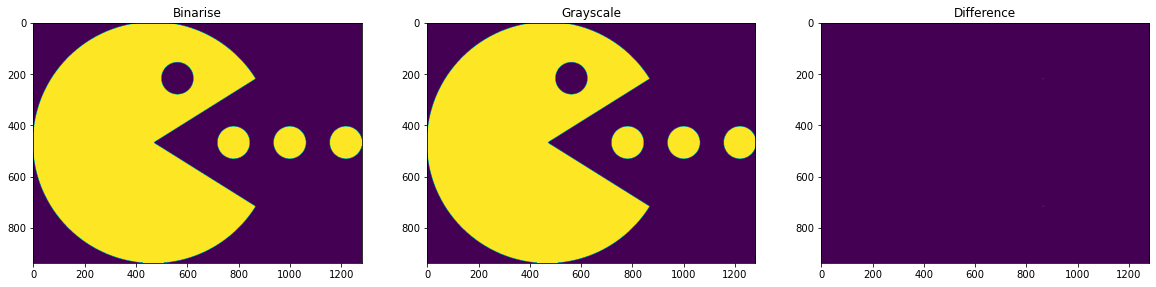

In [87]:
# Binarisation
_, img_th = cv2.threshold(img_ng, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Process the binarized image
img_processed_bin = img_th.copy()

for i in range(3):
    img_processed_bin = cv2.erode(img_processed_bin, struct) 
    
for i in range(3):
    img_processed_bin = cv2.dilate(img_processed_bin, struct)
    
img_processed_bin = cv2.dilate(cv2.erode(img_processed_bin, struct), struct.T)
img_processed_bin = cv2.erode(cv2.dilate(img_processed_bin, struct), struct.T)

# Process the grayscale image
img_processed_ng = img_ng.copy()

img_processed_ng = cv2.erode(img_processed_ng, struct) 
img_processed_ng = cv2.dilate(img_processed_ng, struct)
img_processed_ng = cv2.dilate(cv2.erode(img_processed_ng, struct), struct.T)
img_processed_ng = cv2.erode(cv2.dilate(img_processed_ng, struct), struct.T)

_, img_processed_ng = cv2.threshold(img_processed_ng, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Compare
diff = np.abs(img_processed_ng - img_processed_bin)
print(np.min(diff), np.max(diff))

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_processed_bin)
plt.title('Binarise')
plt.subplot(1, 3, 2)
plt.imshow(img_processed_ng)
plt.title('Grayscale')
plt.subplot(1, 3, 3)
plt.imshow(diff)
plt.title('Difference')